In [1]:
# Import all the required packages.

import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Change the working directory.

os.chdir('D:/fWorks/')
os.listdir()

['ewquirements.txt',
 'Optimization Data 4(case4 update).csv',
 'Optimization Data.csv',
 'Optimization Data.xlsx',
 'Optimization Data2.csv',
 'Optimization Data3.csv',
 'Paper 1_charging mang.pdf']

In [3]:
# Read a CSV file into a Pandas DataFrame.

df = pd.read_csv('Optimization Data 4(case4 update).csv')
df

,Transaction,Preferred Time,Duration,Power,Peak Status,Availablity Status,Cost Mult,Original Cost,Shifted Peak Status,Optimized Cost,Booked Cost,Shifted Time
0,3,6:21,30,8.8,0,0,0.0,4.6,0,4.60,4.6,6:21
1,2,17:12,60,17.6,1,1,1.0,12.0,0,9.00,12.0,17:12
2,11,7:05,30,8.8,0,0,0.0,4.6,0,4.60,4.6,7:05
3,4,17:53,120,35.2,1,1,1.0,20.8,1,17.80,17.8,20:53
4,5,20:12,30,8.8,1,1,1.0,7.6,0,4.60,7.6,20:12
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,21:46,30,8.8,1,1,1.0,7.6,1,4.60,4.6,3:46
496,497,10:55,75,22.0,1,0,0.5,12.7,0,11.95,12.7,10:55
497,498,9:26,120,35.2,1,0,0.5,19.3,0,18.55,19.3,9:26
498,421,5:41,120,35.2,0,0,0.0,17.8,0,17.80,17.8,5:41


In [4]:
"""
Create a new column - Case Type:
Case 1 - Peak Status = 1 and Availability Status = 0
Case 2 - Peak Status = 1 and Availability Status = 1
Case 3 - Peak Status = 0 and Availability Status = 0
Case 4 - Peak Status = 0 and Availability Status = 1
"""


case_type = []
for i in range(df.shape[0]):
    if (df['Peak Status'][i] ==1) and (df['Availablity Status'][i] == 0):
         case_type.append('1')
    elif (df['Peak Status'][i] ==1) and (df['Availablity Status'][i] == 1):
        case_type.append('2')
    elif (df['Peak Status'][i] ==0) and (df['Availablity Status'][i] == 0):
        case_type.append('3')
    elif (df['Peak Status'][i] ==0) and (df['Availablity Status'][i] == 1):
        case_type.append('4')
    
df['Case Type'] = case_type

In [5]:
# Define the ranges
ranges = [
        (0,0.59), (1.0, 1.59), (2.0, 2.59), (3.0, 3.59), (4.0, 4.59), (5.0,5.59), (6.0, 6.59), (7.0, 7.59), (8.0, 8.59), 
        (9.0, 9.59), (10,10.59), (11.0, 11.59), (12.0, 12.59), (13.0, 13.59), (14.0, 14.59), (15.0,15.59), (16.0, 16.59),
        (17.0, 17.59), (18.0, 18.59), (19.0, 19.59), (20.0,20.59), (21.0, 21.59), (22.0, 22.59), (23.0, 23.59),
    ]

def count_values_in_ranges(ranges, values):
    """
        This function takes time ranges and a time value column as input, 
        and it converts them into a dictionary format that counts the occurrence of each value.
    """

    # Initialize an empty dictionary to store the counts
    count_dict = {}
        
    # Initialize counts for each range to zero
    for start, end in ranges:
        count_dict[start] = 0
    
    # Iterate through the values and count them in the appropriate range
    for value in values:
        for start, end in ranges:
            if start <= value <= end:
                count_dict[start] += 1
    
    return count_dict

def sum_values_in_ranges(ranges, time, values):
    """
        This function takes time ranges, a time value, and a value column as input. 
        It converts them into a dictionary format, where the values are summed 
        if their associated time range falls within the specified time ranges.
    """

    
    # Initialize an empty dictionary to store the counts
    sum_dict = {}
        
    # Initialize counts for each range to zero
    for start, end in ranges:
        sum_dict[start] = 0
    
    # Iterate through the values and count them in the appropriate range
    for time, value in zip(time, values):
        for start, end in ranges:
            if start <= time <= end:
                sum_dict[start] += value
    
    return sum_dict



In [6]:
# Convert Preferred Time values to float.
# Count the number of EVs within the specified range and store the results in 'dict1'.

preferred_time = list(df['Preferred Time'])
preferred_time = [float(i.replace(':','.')) for i in preferred_time]

# Charging demand prior to load balancing.
dict1 = count_values_in_ranges(ranges, preferred_time)

# Convert Shifted Time values to float.
# Count the number of EVs within the specified range and store the results in 'dict2'.

shifted_time = list(df['Shifted Time'])
shifted_time = [float(i.replace(':','.')) for i in shifted_time]

# Charging demand after load balancing.

dict2 = count_values_in_ranges(ranges, shifted_time)

# calculate the sum of power demand within the specified time range and store the results in 'dict3'.
power = list(df['Power'])

# power demand prior to load balancing.
dict3 = sum_values_in_ranges(ranges, preferred_time, power)

# power demand after load balancing.
dict4 = sum_values_in_ranges(ranges, shifted_time, power)

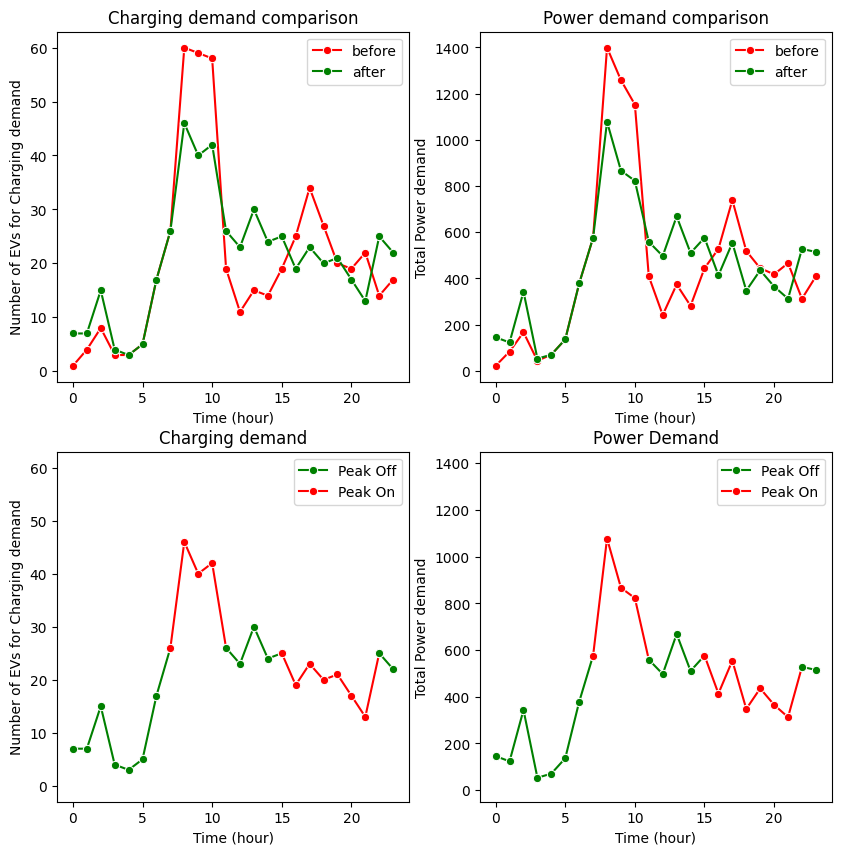

In [28]:
#plots
plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 3)
hours = list(dict2.keys())
charging_demand = list(dict2.values())
plt.title("Charging demand")
plt.xlabel("Time (hour)")
plt.ylim(-3,63)
plt.ylabel("Number of EVs for Charging demand")
sns.lineplot(x=hours[:8], y = charging_demand[:8],color = 'g', linestyle="-", marker='o',label ='Peak Off')
sns.lineplot(x=hours[7:12], y = charging_demand[7:12],color = 'r', linestyle="-", marker='o',label = 'Peak On')
sns.lineplot(x=hours[11:16], y = charging_demand[11:16],color = 'g', linestyle="-", marker='o',)
sns.lineplot(x=hours[15:23], y = charging_demand[15:23],color = 'r',linestyle="-", marker='o',)
sns.lineplot(x=hours[22:], y = charging_demand[22:],color = 'g',linestyle="-", marker='o',);


plt.subplot(2, 2, 4)
hours = list(dict4.keys())
power_demand = list(dict4.values())
plt.title("Power Demand")
plt.xlabel("Time (hour)")
plt.ylabel("Total Power demand")
plt.ylim(-50,1450)
sns.lineplot(x=hours[:8], y = power_demand[:8],color = 'g', linestyle="-", marker='o',label ='Peak Off')
sns.lineplot(x=hours[7:12], y = power_demand[7:12],color = 'r', linestyle="-", marker='o',label = 'Peak On')
sns.lineplot(x=hours[11:16], y = power_demand[11:16],color = 'g', linestyle="-", marker='o',)
sns.lineplot(x=hours[15:23], y = power_demand[15:23],color = 'r',linestyle="-", marker='o',)
sns.lineplot(x=hours[22:], y = power_demand[22:],color = 'g',linestyle="-", marker='o',);



plt.subplot(2, 2, 1)
plt.title("Charging demand comparison")
plt.xlabel("Time (hour)")
plt.ylabel("Number of EVs for Charging demand")
lineplot = sns.lineplot(x= list(dict1.keys()), 
                        y = list(dict1.values()), 
                        linestyle="-", 
                        marker='o',
                        color ='r', 
                        label = "before")
lineplot = sns.lineplot(x= list(dict2.keys()), 
                        y = list(dict2.values()),
                        linestyle="-", 
                        marker='o',
                        color ='g', 
                        label ="after")

plt.subplot(2, 2, 2)
plt.title("Power demand comparison")
plt.xlabel("Time (hour)")
plt.ylabel("Total Power demand")
lineplot = sns.lineplot(x= list(dict3.keys()), 
                        y = list(dict3.values()),
                        linestyle="-", 
                        marker='o',
                        color ='r',
                        label = "before")
lineplot = sns.lineplot(x= list(dict4.keys()), 
                        y = list(dict4.values()),
                        linestyle="-", 
                        marker='o',
                        color ='g', 
                        label = "after")




In [8]:
case1 = df[df['Case Type']=='1']

original_cost_case1 = list(case1['Original Cost'])
optimized_cost_case1 = list(case1['Optimized Cost'])
case1_original_cost = sum_values_in_ranges(ranges, preferred_time, original_cost_case1)
case1_optimized_cost = sum_values_in_ranges(ranges, preferred_time, optimized_cost_case1)

case2 = df[df['Case Type']=='2']

original_cost_case2 = list(case2['Original Cost'])
optimized_cost_case2 = list(case2['Optimized Cost'])
case2_original_cost = sum_values_in_ranges(ranges, preferred_time, original_cost_case2)
case2_optimized_cost = sum_values_in_ranges(ranges, preferred_time, optimized_cost_case2)

case3 = df[df['Case Type']=='3']

original_cost_case3 = list(case3['Original Cost'])
optimized_cost_case3 = list(case3['Optimized Cost'])
case3_original_cost = sum_values_in_ranges(ranges, preferred_time, original_cost_case3)
case3_optimized_cost = sum_values_in_ranges(ranges, preferred_time, optimized_cost_case3)

case4 = df[df['Case Type']=='4']

original_cost_case4 = list(case4['Original Cost'])
optimized_cost_case4 = list(case4['Optimized Cost'])
case4_original_cost = sum_values_in_ranges(ranges, preferred_time, original_cost_case4)
case4_optimized_cost = sum_values_in_ranges(ranges, preferred_time, optimized_cost_case4)

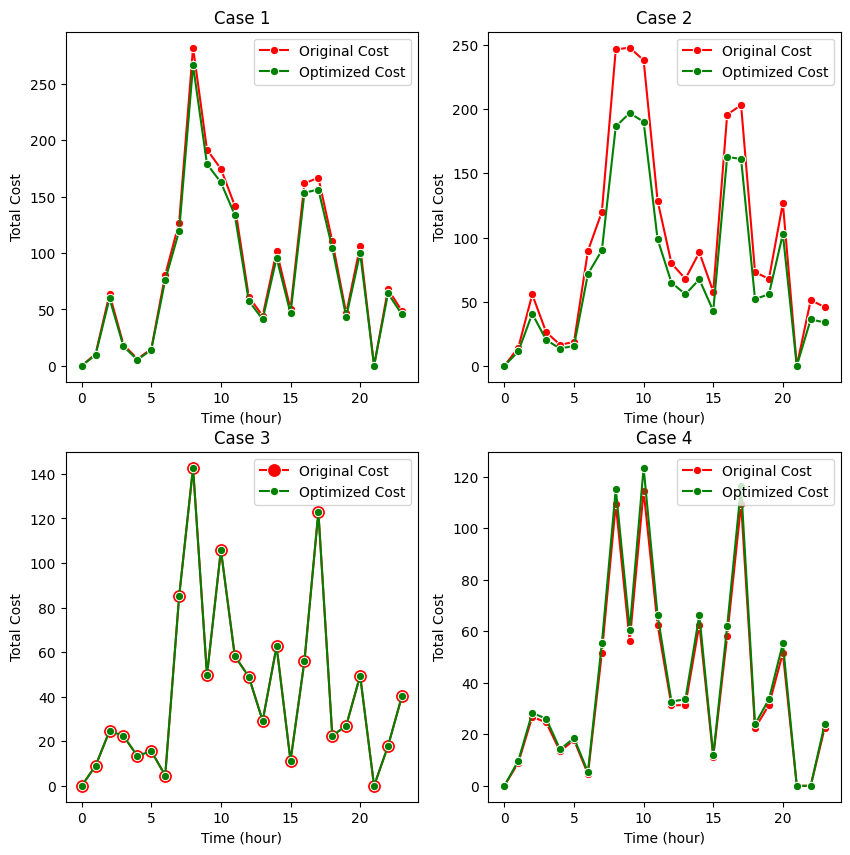

In [9]:
#plots
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title("Case 1")
plt.xlabel("Time (hour)")
plt.ylabel("Total Cost")
lineplot = sns.lineplot(x= list(case1_original_cost.keys()), 
                        y = list(case1_original_cost.values()), 
                        linestyle="-", 
                        marker='o',
                        color ='r', 
                        label = "Original Cost")
lineplot = sns.lineplot(x= list(case1_optimized_cost.keys()), 
                        y = list(case1_optimized_cost.values()),
                        linestyle="-", 
                        marker='o',
                        color ='g', 
                        label ="Optimized Cost")

plt.subplot(2, 2, 2)
plt.title("Case 2")
plt.xlabel("Time (hour)")
plt.ylabel("Total Cost")
lineplot = sns.lineplot(x= list(case2_original_cost.keys()), 
                        y = list(case2_original_cost.values()),
                        linestyle="-", 
                        marker='o',
                        color ='r',
                        label = "Original Cost")
lineplot = sns.lineplot(x= list(case2_optimized_cost.keys()), 
                        y = list(case2_optimized_cost.values()),
                        linestyle="-", 
                        marker='o',
                        color ='g', 
                        label = "Optimized Cost")

plt.subplot(2, 2, 3)
plt.title("Case 3")
plt.xlabel("Time (hour)")
plt.ylabel("Total Cost")
lineplot = sns.lineplot(x= list(case3_original_cost.keys()), 
                        y = list(case3_original_cost.values()), 
                        linestyle="-", 
                        marker='o',
                        markersize = 10,
                        color ='r', 
                        label = "Original Cost")
lineplot = sns.lineplot(x= list(case3_optimized_cost.keys()), 
                        y = list(case3_optimized_cost.values()),
                        linestyle="-", 
                        marker='o',
                        color ='g', 
                        label ="Optimized Cost")

plt.subplot(2, 2, 4)
plt.title("Case 4")
plt.xlabel("Time (hour)")
plt.ylabel("Total Cost")
lineplot = sns.lineplot(x= list(case4_original_cost.keys()), 
                        y = list(case4_original_cost.values()),
                        linestyle="-", 
                        marker='o',
                        color ='r',
                        label = "Original Cost")
lineplot = sns.lineplot(x= list(case4_optimized_cost.keys()), 
                        y = list(case4_optimized_cost.values()),
                        linestyle="-", 
                        marker='o',
                        color ='g', 
                        label = "Optimized Cost")

In [24]:
# Average original cost and Optimized cost per case type

df[['Original Cost','Optimized Cost']].groupby(df['Case Type']).mean().round(2)                                                                            

,Original Cost,Optimized Cost
Case Type,,
1,12.44,11.69
2,13.86,10.86
3,11.45,11.45
4,11.39,12.14


In [11]:
df.sort_values(by = ['Case Type'], inplace = True)
df['Discount'] =  df['Original Cost'] - df['Optimized Cost']
discount = list(df['Discount'])
preferred_time = list(df['Preferred Time'])
preferred_time = [float(i.replace(':','.')) for i in preferred_time]

new_df = df[df['Shifted Peak Status'] == 1]
new_df.sort_values(by = ['Case Type'], inplace = True)
new_df['Profit'] = new_df['Original Cost'] - new_df['Booked Cost']

profit = list(new_df['Profit'])
new_preferred_time = list(new_df['Preferred Time'])
new_preferred_time = [float(i.replace(':','.')) for i in new_preferred_time]



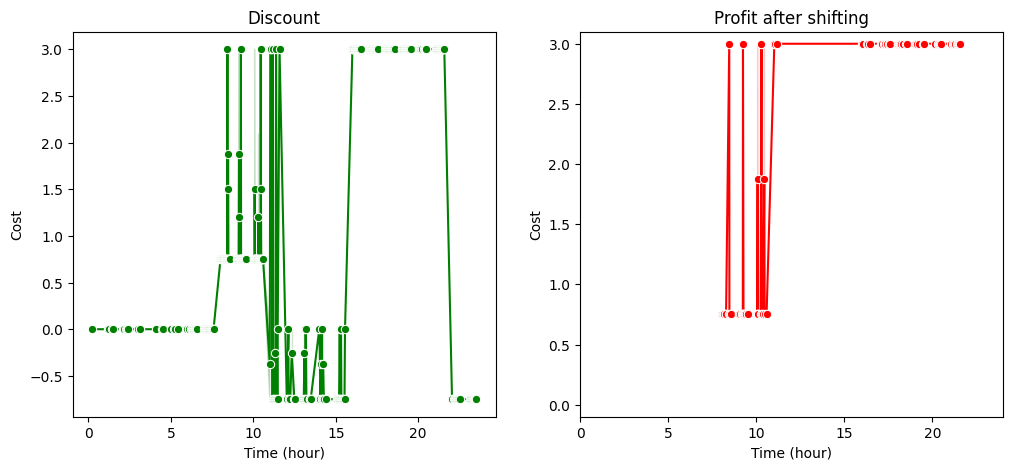

In [21]:
#plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Discount")
plt.xlabel("Time (hour)")
plt.ylabel("Cost")
lineplot = sns.lineplot(x= preferred_time, 
                        y = discount, 
                        linestyle="-", 
                        marker='o',
                        color ='g', 
#                         hue = df['Case Type']
                        )


plt.subplot(1, 2, 2)
plt.title("Profit after shifting")
plt.xlabel("Time (hour)")
plt.ylabel("Cost")
plt.ylim([-0.1,3.1])
plt.xlim([0,24])
lineplot = sns.lineplot(x= new_preferred_time, 
                        y = profit,
                        linestyle="-", 
                        marker='o',
                        color ='r',
#                         hue = new_df['Case Type']
                        )


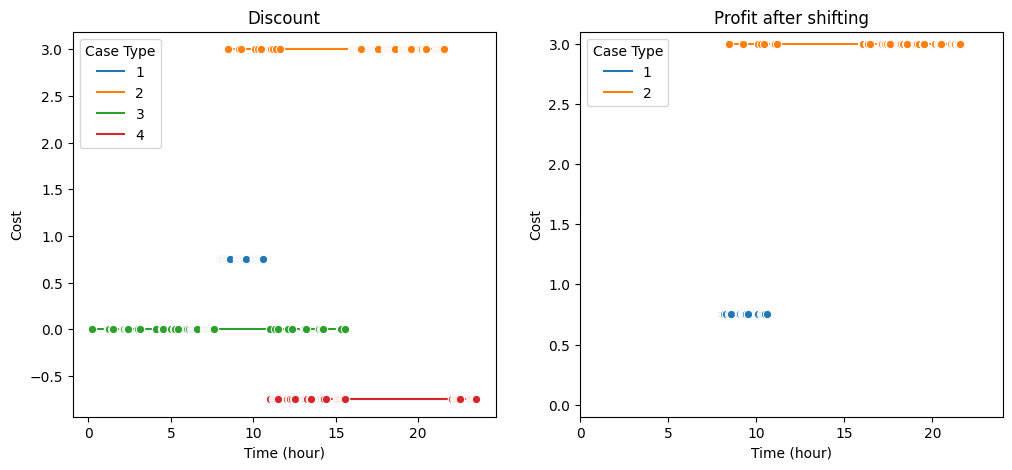

In [22]:
#plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Discount")
plt.xlabel("Time (hour)")
plt.ylabel("Cost")
lineplot = sns.lineplot(x= preferred_time, 
                        y = discount, 
                        linestyle="-", 
                        marker='o',
                        color ='g', 
                        hue = df['Case Type']
                        )


plt.subplot(1, 2, 2)
plt.title("Profit after shifting")
plt.xlabel("Time (hour)")
plt.ylabel("Cost")
plt.ylim([-0.1,3.1])
plt.xlim([0,24])
lineplot = sns.lineplot(x= new_preferred_time, 
                        y = profit,
                        linestyle="-", 
                        marker='o',
                        color ='r',
                        hue = new_df['Case Type']
                        )
